# Predict Stock Prices Using Machine Learning

This is an introduction notebook for the analysis of stock market prices. In this notebook, 2 machine learning models are used to predict the price of stock.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline  

In [2]:
# Data fetching for the NFLX stock
data = yf.download('NFLX', period="1y")
data.head(6)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-02,378.000000,383.500000,374.510010,379.059998,379.059998,5398200
2019-05-03,381.529999,385.029999,378.269989,385.029999,385.029999,5130300
2019-05-06,377.690002,381.350006,376.000000,378.670013,378.670013,5793100
2019-05-07,377.000000,379.910004,365.809998,370.459991,370.459991,6974900
2019-05-08,367.920013,369.000000,361.359985,364.369995,364.369995,6572000
2019-05-09,360.899994,364.200012,352.750000,362.750000,362.750000,5882600


Text(0.5, 1.0, 'NFLX closing price')

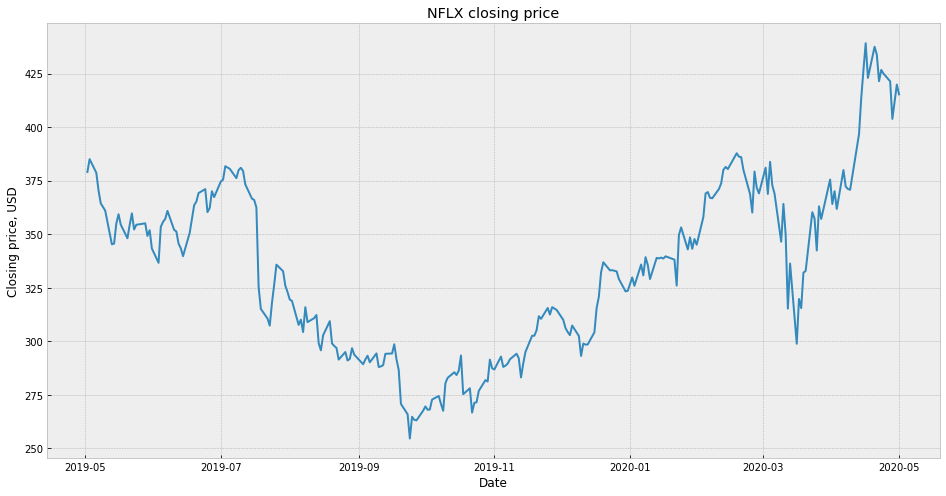

In [7]:
# Plot the closing price
plt.figure(figsize=(16,8))
plt.plot(data['Close'])
plt.ylabel('Closing price, USD')
plt.xlabel('Date')
plt.title('NFLX closing price')

In [11]:
# Closing price
df = data[['Close']]
# Create a variable to predict 'x' days out into the future
future_days = 25
# Create a new column shifted 'x' units up
df['Prediction'] = df[['Close']].shift(-future_days)

/Users/tafintse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# Create the feature set (X) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[379.05999756]
 [385.02999878]
 [378.67001343]
 [370.45999146]
 [364.36999512]
 [362.75      ]
 [361.04000854]
 [345.26000977]
 [345.60998535]
 [354.98999023]
 [359.30999756]
 [354.45001221]
 [348.10998535]
 [354.26998901]
 [359.73001099]
 [352.20999146]
 [354.39001465]
 [355.05999756]
 [349.19000244]
 [351.8500061 ]
 [343.27999878]
 [336.63000488]
 [353.3999939 ]
 [355.73001099]
 [357.13000488]
 [360.86999512]
 [352.01000977]
 [351.26998901]
 [345.55999756]
 [343.42999268]
 [339.73001099]
 [350.61999512]
 [357.11999512]
 [363.51998901]
 [365.20999146]
 [369.20999146]
 [371.04000854]
 [360.29998779]
 [362.20001221]
 [370.01998901]
 [367.32000732]
 [374.6000061 ]
 [375.42999268]
 [381.72000122]
 [380.54998779]
 [376.16000366]
 [379.92999268]
 [381.        ]
 [379.5       ]
 [373.25      ]
 [366.6000061 ]
 [365.98999023]
 [362.44000244]
 [325.20999146]
 [315.1000061 ]
 [310.61999512]
 [307.29998779]
 [317.94000244]
 [326.45999146]
 [335.77999878]
 [332.70001221]
 [325.92999268]
 [322.98

In [13]:
# Create the target data set (y) and convert it to numpy array and get the target values except of the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[360.86999512 352.01000977 351.26998901 345.55999756 343.42999268
 339.73001099 350.61999512 357.11999512 363.51998901 365.20999146
 369.20999146 371.04000854 360.29998779 362.20001221 370.01998901
 367.32000732 374.6000061  375.42999268 381.72000122 380.54998779
 376.16000366 379.92999268 381.         379.5        373.25
 366.6000061  365.98999023 362.44000244 325.20999146 315.1000061
 310.61999512 307.29998779 317.94000244 326.45999146 335.77999878
 332.70001221 325.92999268 322.98999023 319.5        318.82998657
 307.63000488 310.1000061  304.29000854 315.8999939  308.92999268
 310.82998657 312.27999878 299.10998535 295.76000977 302.79998779
 309.38000488 298.98999023 297.80999756 296.92999268 291.44000244
 294.98001099 291.02999878 291.76998901 296.77999878 293.75
 289.29000854 291.51998901 293.25       290.17001343 294.33999634
 287.98999023 288.26998901 288.85998535 294.1499939  294.29000854
 298.6000061  291.55999756 286.6000061  270.75       265.92001343
 254.58999634 264.75   

In [14]:
# Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [16]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[380.07000732]
 [368.70001221]
 [360.08999634]
 [379.23999023]
 [371.70999146]
 [369.02999878]
 [381.04998779]
 [368.76998901]
 [383.79000854]
 [372.77999878]
 [368.97000122]
 [346.48999023]
 [364.13000488]
 [349.92001343]
 [315.25      ]
 [336.29998779]
 [298.83999634]
 [319.75      ]
 [315.47000122]
 [332.02999878]
 [332.82998657]
 [360.26998901]
 [357.32000732]
 [342.39001465]
 [362.98999023]]


In [17]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[357.11999512 370.95999146 403.82998657 364.07998657 325.92999268
 361.76000977 379.95999146 372.27999878 371.11999512 370.72000122
 396.72000122 413.54998779 426.75       439.17001343 422.95999146
 437.48999023 433.82998657 421.42001343 426.70001221 424.98999023
 421.38000488 403.82998657 411.89001465 419.8500061  415.26998901]

[370.40964682 362.89408122 357.20286162 369.86100561 364.88367719
 363.11220231 371.05741381 362.94033588 372.86856724 365.59095192
 363.07254393 348.21325899 359.87330685 350.48050397 327.56362867
 341.47766843 316.71661795 330.53812821 327.70904945 338.65520613
 339.18399798 357.32183676 355.37189917 345.50317555 359.11975728]


/Users/tafintse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


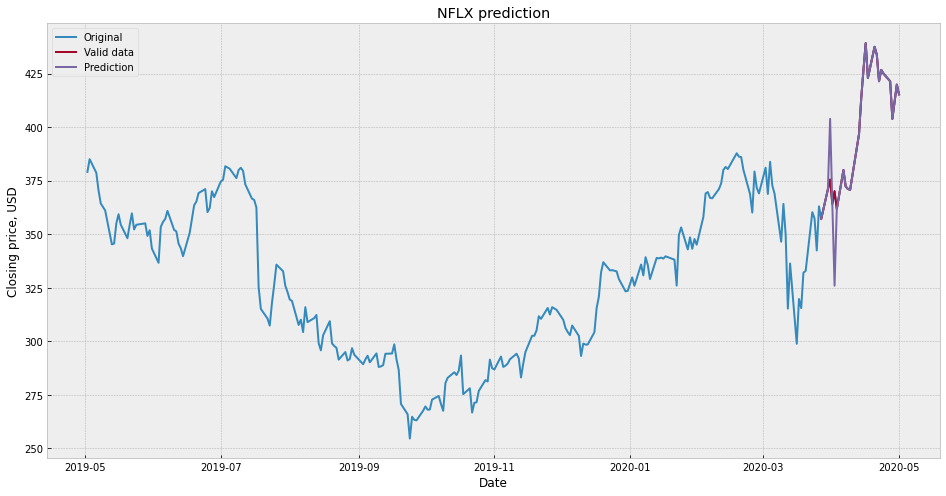

In [20]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('NFLX prediction')
plt.xlabel('Date')
plt.ylabel('Closing price, USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Prediction'])

/Users/tafintse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


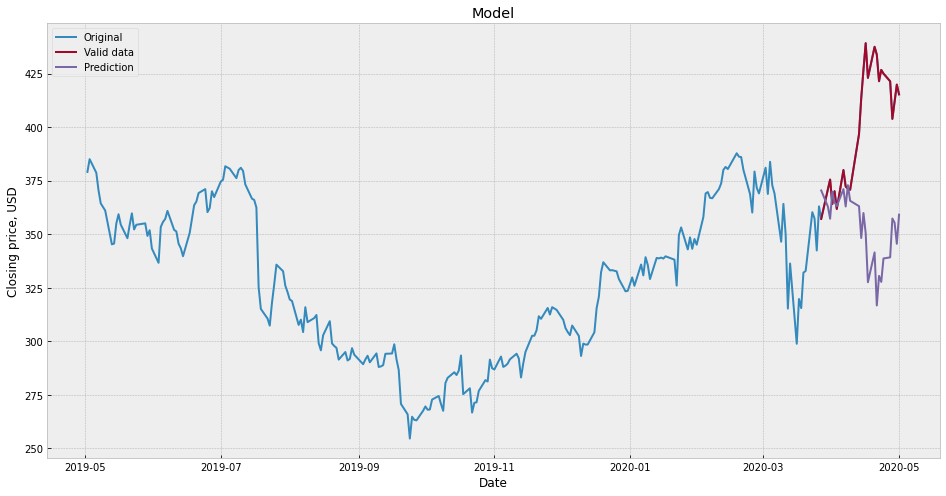

In [21]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing price, USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Prediction'])